## Keras_fashion_minst辨識

In [1]:
import numpy as np  
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os

In [2]:
(X_trains, y_trains), (X_tests, y_tests)= tf.keras.datasets.fashion_mnist.load_data()
print ("X_trains.shape:",X_trains.shape,"y_trains.shape:", y_trains.shape)

X_trains.shape: (60000, 28, 28) y_trains.shape: (60000,)


y = 0 T-shirt/top


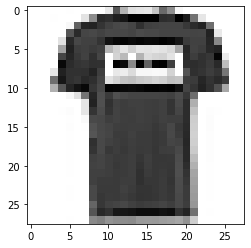

In [3]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
img = 1
#img = X_trains[4].reshape(28, 28)
label_index = y_trains[img]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(X_trains[img], cmap='Greys')

In [4]:
data = X_trains[1].copy()
data[data>0]=1
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image


['[0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_trains) 
y_TestOneHot = np_utils.to_categorical(y_tests) 
y_TestOneHot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [6]:
X_train_2D = X_trains.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_tests.reshape(10000, 28*28).astype('float32')  
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [7]:
# 建立簡單的線性執行的模型
model= keras.models.Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer="normal", activation='relu'))
model.add(Dense(units=10, kernel_initializer="normal", activation="softmax"))
#編譯損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#進行訓練
train_history=model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=25, batch_size=800, verbose=2)

Epoch 1/25


60/60 - 1s - loss: 0.8262 - accuracy: 0.7300 - val_loss: 0.5424 - val_accuracy: 0.8127


Epoch 2/25


60/60 - 1s - loss: 0.4945 - accuracy: 0.8321 - val_loss: 0.4655 - val_accuracy: 0.8410


Epoch 3/25


60/60 - 1s - loss: 0.4407 - accuracy: 0.8486 - val_loss: 0.4298 - val_accuracy: 0.8515


Epoch 4/25


60/60 - 1s - loss: 0.4067 - accuracy: 0.8601 - val_loss: 0.4117 - val_accuracy: 0.8610


Epoch 5/25


60/60 - 1s - loss: 0.3860 - accuracy: 0.8671 - val_loss: 0.3959 - val_accuracy: 0.8597


Epoch 6/25


60/60 - 1s - loss: 0.3649 - accuracy: 0.8732 - val_loss: 0.3871 - val_accuracy: 0.8653


Epoch 7/25


60/60 - 1s - loss: 0.3486 - accuracy: 0.8778 - val_loss: 0.3633 - val_accuracy: 0.8749


Epoch 8/25


60/60 - 1s - loss: 0.3392 - accuracy: 0.8800 - val_loss: 0.3745 - val_accuracy: 0.8683


Epoch 9/25


60/60 - 1s - loss: 0.3286 - accuracy: 0.8840 - val_loss: 0.3631 - val_accuracy: 0.8707


Epoch 10/25


60/60 - 1s - loss: 0.3186 - accuracy: 0.8864 - val_loss: 0.3520 - val_accuracy: 0.8761


Epoch 11/25


60/60 - 1s - loss: 0.3101 - accuracy: 0.8908 - val_loss: 0.3512 - val_accuracy: 0.8765


Epoch 12/25


60/60 - 1s - loss: 0.2973 - accuracy: 0.8948 - val_loss: 0.3408 - val_accuracy: 0.8802


Epoch 13/25


60/60 - 1s - loss: 0.2922 - accuracy: 0.8959 - val_loss: 0.3358 - val_accuracy: 0.8792


Epoch 14/25


60/60 - 1s - loss: 0.2819 - accuracy: 0.8999 - val_loss: 0.3302 - val_accuracy: 0.8818


Epoch 15/25


60/60 - 1s - loss: 0.2783 - accuracy: 0.8999 - val_loss: 0.3327 - val_accuracy: 0.8823


Epoch 16/25


60/60 - 1s - loss: 0.2739 - accuracy: 0.9030 - val_loss: 0.3292 - val_accuracy: 0.8829


Epoch 17/25


60/60 - 1s - loss: 0.2686 - accuracy: 0.9039 - val_loss: 0.3502 - val_accuracy: 0.8731


Epoch 18/25


60/60 - 1s - loss: 0.2614 - accuracy: 0.9073 - val_loss: 0.3234 - val_accuracy: 0.8846


Epoch 19/25


60/60 - 1s - loss: 0.2522 - accuracy: 0.9105 - val_loss: 0.3197 - val_accuracy: 0.8862


Epoch 20/25


60/60 - 1s - loss: 0.2511 - accuracy: 0.9105 - val_loss: 0.3361 - val_accuracy: 0.8772


Epoch 21/25


60/60 - 1s - loss: 0.2525 - accuracy: 0.9088 - val_loss: 0.3173 - val_accuracy: 0.8870


Epoch 22/25


60/60 - 1s - loss: 0.2435 - accuracy: 0.9123 - val_loss: 0.3283 - val_accuracy: 0.8858


Epoch 23/25


60/60 - 1s - loss: 0.2350 - accuracy: 0.9163 - val_loss: 0.3203 - val_accuracy: 0.8860


Epoch 24/25


60/60 - 1s - loss: 0.2338 - accuracy: 0.9161 - val_loss: 0.3275 - val_accuracy: 0.8867


Epoch 25/25


60/60 - 1s - loss: 0.2307 - accuracy: 0.9169 - val_loss: 0.3166 - val_accuracy: 0.8872


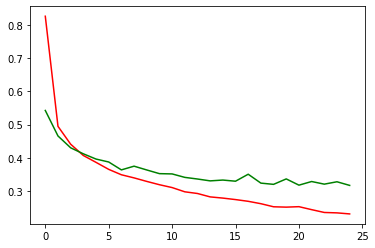

In [8]:
plt.plot(train_history.history["loss"], "r")
plt.plot(train_history.history["val_loss"], "g")

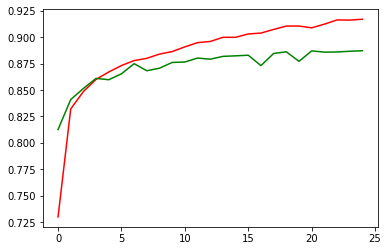

In [9]:
plt.plot(train_history.history["accuracy"], "r")
plt.plot(train_history.history["val_accuracy"], "g")

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)   
print(f"準確度 = {scores[1]*100.0:2.1f}")

  1/313 [..............................] - ETA: 0s - loss: 0.1771 - accuracy: 0.9375

 30/313 [=>............................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8802

 60/313 [====>.........................] - ETA: 0s - loss: 0.3059 - accuracy: 0.8870

 91/313 [=======>......................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8850

118/313 [==========>...................] - ETA: 0s - loss: 0.3369 - accuracy: 0.8800

147/313 [=============>................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8795

177/313 [===============>..............] - ETA: 0s - loss: 0.3529 - accuracy: 0.8771

206/313 [==================>...........] - ETA: 0s - loss: 0.3506 - accuracy: 0.8774

234/313 [=====================>........] - ETA: 0s - loss: 0.3457 - accuracy: 0.8775

264/313 [========================>.....] - ETA: 0s - loss: 0.3395 - accuracy: 0.8795

295/313 [===========================>..] - ETA: 0s - loss: 0.3403 - accuracy: 0.8792



313/313 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8795


準確度 = 87.9
